In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as sk
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [5]:
input_file = 'troop_movements.csv'
starwars_df = pd.read_csv(input_file); starwars_df.head(4)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2023-07-11 16:06:31,1,stormtrooper,empire,10,7,5,1,Eriadu
1,2023-07-11 16:06:30,2,at-at,empire,8,1,10,4,Dagobah
2,2023-07-11 16:06:29,3,resistance_soldier,resistance,3,3,7,8,Toydaria
3,2023-07-11 16:06:28,4,tie_fighter,resistance,1,1,3,7,Iridonia


In [11]:
starwars_df.empire_or_resistance[starwars_df.empire_or_resistance == 'empire'].count() , starwars_df.empire_or_resistance[starwars_df.empire_or_resistance == 'resistance'].count()

(515, 485)

In [32]:
er_counts = starwars_df.empire_or_resistance.value_counts().reset_index()
er_counts.columns = ['empire_or_resistance', 'count']
er_counts

,empire_or_resistance,count
0,empire,515
1,resistance,485


In [33]:
hw_counts = starwars_df.homeworld.value_counts().reset_index()
hw_counts.columns = ['homeworld', 'count']
hw_counts

,homeworld,count
0,Skako,40
1,Alderaan,33
2,Eriadu,31
3,Champala,29
4,Rodia,28
5,Glee Anselm,27
6,Kashyyyk,27
7,Naboo,27
8,Mon Cala,27
9,Tatooine,27


In [34]:
unit_counts = starwars_df.unit_type.value_counts().reset_index()
unit_counts.columns = ['unit_type', 'count']
unit_counts

,unit_type,count
0,stormtrooper,138
1,unknown,134
2,tie_fighter,132
3,tie_silencer,127
4,at-st,126
5,at-at,123
6,x-wing,113
7,resistance_soldier,107


In [30]:
starwars_df['is_resistance'] = starwars_df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False; starwars_df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2023-07-11 16:06:31,1,stormtrooper,empire,10,7,5,1,Eriadu,False
1,2023-07-11 16:06:30,2,at-at,empire,8,1,10,4,Dagobah,False
2,2023-07-11 16:06:29,3,resistance_soldier,resistance,3,3,7,8,Toydaria,True
3,2023-07-11 16:06:28,4,tie_fighter,resistance,1,1,3,7,Iridonia,True
4,2023-07-11 16:06:27,5,unknown,empire,2,5,7,10,Aleen Minor,False
...,...,...,...,...,...,...,...,...,...,...
995,2023-07-11 15:49:56,996,tie_silencer,resistance,3,6,7,5,Dathomir,True
996,2023-07-11 15:49:55,997,at-at,resistance,4,3,1,7,Eriadu,True
997,2023-07-11 15:49:54,998,tie_fighter,resistance,10,10,5,9,Socorro,True
998,2023-07-11 15:49:53,999,unknown,empire,10,4,9,10,Toydaria,False


Text(0.5, 1.0, 'Character Count by Empire or Resistance')

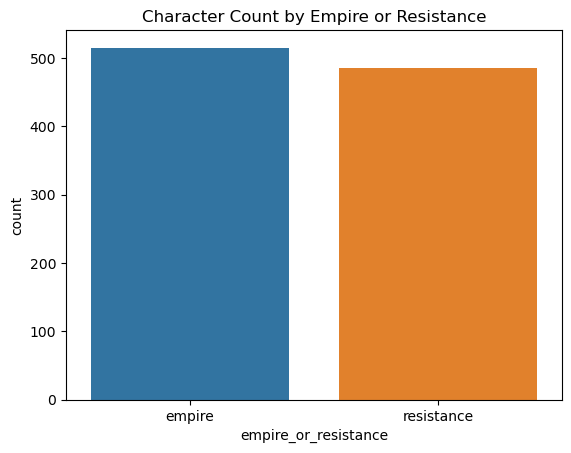

In [46]:
sns.barplot(data = er_counts, x='empire_or_resistance', y='count')
plt.title('Character Count by Empire or Resistance')

In [64]:

X = starwars_df[['homeworld', 'unit_type']]
X = pd.concat([])
y = starwars_df["empire_or_resistance"]
y=[0,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)




ValueError: Found input variables with inconsistent numbers of samples: [1000, 2]

In [55]:
X = starwars_df[['homeworld', 'unit_type']]; X

,homeworld,unit_type
0,Eriadu,stormtrooper
1,Dagobah,at-at
2,Toydaria,resistance_soldier
3,Iridonia,tie_fighter
4,Aleen Minor,unknown
...,...,...
995,Dathomir,tie_silencer
996,Eriadu,at-at
997,Socorro,tie_fighter
998,Toydaria,unknown


In [65]:
clf = sk()
training_model = clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Corellia'